In [1]:
from core import *
import requests, json

In [2]:
dataset_id = {
    'all': 'd_6e50a06c6be69b2f72ec0f4ab1cb5d84', 
}
dataset_mode = 'all'

In [3]:
response = requests.get(
    'https://data.gov.sg/api/action/datastore_search', 
    params={
        'resource_id': dataset_id[dataset_mode],
        'limit': 999
    }
)
print(json.dumps(response.json(), indent=2))

{
  "help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "resource_id": "d_6e50a06c6be69b2f72ec0f4ab1cb5d84",
    "fields": [
      {
        "type": "text",
        "id": "DataSeries"
      },
      {
        "type": "numeric",
        "id": "2023"
      },
      {
        "type": "numeric",
        "id": "2022"
      },
      {
        "type": "numeric",
        "id": "2021"
      },
      {
        "type": "numeric",
        "id": "2020"
      },
      {
        "type": "numeric",
        "id": "2019"
      },
      {
        "type": "numeric",
        "id": "2018"
      },
      {
        "type": "numeric",
        "id": "2017"
      },
      {
        "type": "numeric",
        "id": "2016"
      },
      {
        "type": "numeric",
        "id": "2015"
      },
      {
        "type": "numeric",
        "id": "2014"
      },
      {
        "type": "numeric",
        "id": "2013"
      },
      {
        "type": "numeri

In [4]:
data = response.json()
records = data['result']['records']
df = pd.DataFrame(records)
df['DataSeries'] = df['DataSeries'].str.strip()
df['SubDataSeries'] = df['DataSeries'].str.extract(r'(?i)\b(male|female)s?\b').ffill()
df['DataSeries'] = df['DataSeries'].str.extract(r'(?i)\b(\d+.*)\b', expand=True)
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)\W*\byears?\b|\s+', '', regex=True).str.replace(r'(?i)\W*over\b', '+', regex=True).str.strip()
df = df.dropna(subset=['DataSeries'])
df = df.rename(columns={'DataSeries': 'age_group', 'SubDataSeries': 'gender'}).drop(columns=['_id'])
df['age_group'] = pd.Categorical(df['age_group'], ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'], ordered=True)
df['gender'] = pd.Categorical(df['gender'], ['Female', 'Male'], ordered=False)
for col in df.drop(columns=['gender', 'age_group']).columns:
    try:
        df[col] = df[col].astype('float').div(1000)
    except:
        df[col] = df[col].str.strip().where(df[col].str.contains(r'\d+(?:\.\d+)?', na=False)).astype('float').div(1000)
df = df.groupby(by=['gender', 'age_group'], observed=True).sum()
df = df.rename(columns=int).transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms', 'comparison']).rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms']).rename(columns=int).astype('int').unstack(level=0).sort_index(axis=0).sort_index(axis=1).copy(deep=True)
assert isinstance(df, pd.DataFrame)
display_all_columns(df)

gender     Female                                            Male          \
age_group   20-24   25-29   30-34   35-39   40-44   45-49   20-24   25-29   
1980       0.0076  0.0069  0.0055  0.0035  0.0022  0.0010  0.0059  0.0069   
1981       0.0095  0.0086  0.0059  0.0040  0.0029  0.0014  0.0066  0.0091   
1982       0.0098  0.0089  0.0060  0.0045  0.0026  0.0010  0.0080  0.0087   
1983       0.0109  0.0082  0.0060  0.0041  0.0025  0.0015  0.0086  0.0091   
1984       0.0113  0.0089  0.0065  0.0045  0.0027  0.0018  0.0121  0.0095   
1985       0.0127  0.0094  0.0060  0.0042  0.0026  0.0021  0.0134  0.0095   
1986       0.0128  0.0102  0.0066  0.0049  0.0027  0.0023  0.0125  0.0102   
1987       0.0142  0.0103  0.0066  0.0047  0.0032  0.0021  0.0179  0.0118   
1988       0.0180  0.0111  0.0065  0.0053  0.0033  0.0020  0.0161  0.0128   
1989       0.0170  0.0112  0.0065  0.0050  0.0034  0.0019  0.0121  0.0134   
1990       0.0139  0.0128  0.0084  0.0061  0.0045  0.0027  0.0134  0.0133   
1991       0.0186  0.0144  0.0101  0.0074  0.0052  0.0039  0.0234  0.0159   
1992       0.0156  0.0120  0.0085  0.0068  0.0051  0.0036  0.0169  0.0132   
1993       0.0167  0.0113  0.0091  0.0066  0.0048  0.0036  0.0124  0.0137   
1994       0.0149  0.0100  0.0077  0.0061  0.0049  0.0033  0.0162  0.0114   
1995       0.0156  0.0111  0.0086  0.0075  0.0055  0.0040  0.0149  0.0120   
1996       0.0156  0.0114  0.0092  0.0075  0.0063  0.0047  0.0155  0.0122   
1997       0.0191  0.0135  0.0092  0.0073  0.0056  0.0045  0.0205  0.0137   
1998       0.0266  0.0142  0.0109  0.0082  0.0066  0.0056  0.0272  0.0182   
1999       0.0218  0.0134  0.0100  0.0079  0.0064  0.0048  0.0320  0.0151   
2000       0.0207  0.0132  0.0098  0.0074  0.0058  0.0046  0.0262  0.0141   
2001       0.0232  0.0140  0.0091  0.0073  0.0056  0.0045  0.0302  0.0148   
2002       0.0262  0.0159  0.0118  0.0083  0.0064  0.0047  0.0427  0.0173   
2003       0.0271  0.0167  0.0128  0.0098  0.0070  0.0050  0.0300  0.0194   
2004       0.0280  0.0163  0.0122  0.0079  0.0061  0.0044  0.0372  0.0210   
2005       0.0257  0.0169  0.0136  0.0088  0.0065  0.0050  0.0321  0.0191   
2006       0.0281  0.0173  0.0140  0.0092  0.0068  0.0048  0.0327  0.0210   
2007       0.0285  0.0180  0.0135  0.0097  0.0067  0.0050  0.0357  0.0202   
2008       0.0281  0.0168  0.0140  0.0100  0.0070  0.0054  0.0329  0.0191   
2009       0.0225  0.0150  0.0132  0.0107  0.0072  0.0058  0.0273  0.0174   
2010       0.0244  0.0150  0.0128  0.0107  0.0079  0.0062  0.0249  0.0163   
2011       0.0278  0.0178  0.0120  0.0110  0.0085  0.0062  0.0266  0.0203   
2012       0.0291  0.0158  0.0120  0.0100  0.0082  0.0056  0.0284  0.0217   
2013       0.0267  0.0175  0.0124  0.0103  0.0080  0.0063  0.0258  0.0217   
2014       0.0235  0.0160  0.0117  0.0101  0.0083  0.0061  0.0253  0.0202   
2015       0.0263  0.0153  0.0116  0.0096  0.0088  0.0064  0.0308  0.0178   
2016       0.0286  0.0151  0.0119  0.0101  0.0084  0.0062  0.0276  0.0167   
2017       0.0279  0.0143  0.0121  0.0099  0.0083  0.0069  0.0259  0.0168   
2018       0.0277  0.0147  0.0118  0.0102  0.0082  0.0065  0.0286  0.0156   
2019       0.0300  0.0153  0.0117  0.0108  0.0086  0.0069  0.0306  0.0160   
2020       0.0275  0.0140  0.0121  0.0100  0.0081  0.0065  0.0259  0.0146   
2021       0.0255  0.0151  0.0132  0.0118  0.0096  0.0081  0.0253  0.0161   
2022       0.0223  0.0122  0.0102  0.0097  0.0081  0.0070  0.0170  0.0137   
2023       0.0199  0.0116  0.0105  0.0095  0.0081  0.0062  0.0166  0.0137   

gender                                     
age_group   30-34   35-39   40-44   45-49  
1980       0.0065  0.0044  0.0038  0.0021  
1981       0.0074  0.0059  0.0041  0.0029  
1982       0.0076  0.0057  0.0038  0.0031  
1983       0.0073  0.0055  0.0039  0.0030  
1984       0.0076  0.0058  0.0042  0.0028  
1985       0.0078  0.0056  0.0039  0.0027  
1986       0.0080  0.0064  0.0047  0.0031  
1987       0.0074  0.0061  0.0051  0.0030  
1988       0.0081

In [5]:
df_cohort = df.rename_axis(index='year').stack(level=['age_group']).reset_index(drop=False).copy(deep=True)
df_cohort['cohort'] = df_cohort['age_group'].str.extract(r'(?i)(\d+)')
df_cohort['cohort'] = df_cohort['year'].subtract(df_cohort['cohort'].astype('int')).map(lambda val: f'{val-4:.0f}-{val:.0f}')
for col in ['age_group']:
    df_cohort[col] = pd.Categorical(df_cohort[col], df_cohort[col].sort_values().unique(), ordered=True)
df_cohort['measure'] = 'Divorce Rate'
df_cohort = df_cohort.drop(columns=['year']).set_index(keys=['cohort', 'age_group', 'measure'], append=False).sort_index(axis=1).sort_index(axis=0).copy(deep=True)
df_cohort = df_cohort.T.stack(level=['age_group']).unstack(level=['gender']).sort_index(axis=1).sort_index(axis=0).copy(deep=True)
display_all_columns(df_cohort)

/tmp/ipykernel_29010/3780485549.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cohort = df.rename_axis(index='year').stack(level=['age_group']).reset_index(drop=False).copy(deep=True)
/tmp/ipykernel_29010/3780485549.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cohort = df_cohort.T.stack(level=['age_group']).unstack(level=['gender']).sort_index(axis=1).sort_index(axis=0).copy(deep=True)


cohort       1931-1935            1932-1936            1933-1937          \
measure   Divorce Rate         Divorce Rate         Divorce Rate           
gender          Female    Male       Female    Male       Female    Male   
age_group                                                                  
20-24              NaN     NaN          NaN     NaN          NaN     NaN   
25-29              NaN     NaN          NaN     NaN          NaN     NaN   
30-34              NaN     NaN          NaN     NaN          NaN     NaN   
35-39              NaN     NaN          NaN     NaN          NaN     NaN   
40-44              NaN     NaN          NaN     NaN          NaN     NaN   
45-49            0.001  0.0021       0.0014  0.0029        0.001  0.0031   

cohort       1934-1938           1935-1939            1936-1940          \
measure   Divorce Rate        Divorce Rate         Divorce Rate           
gender          Female   Male       Female    Male       Female    Male   
age_group                                                                 
20-24              NaN    NaN          NaN     NaN          NaN     NaN   
25-29              NaN    NaN          NaN     NaN          NaN     NaN   
30-34              NaN    NaN          NaN     NaN          NaN     NaN   
35-39              NaN    NaN          NaN     NaN          NaN     NaN   
40-44              NaN    NaN          NaN     NaN       0.0022  0.0038   
45-49           0.0015  0.003       0.0018  0.0028       0.0021  0.0027   

cohort       1937-1941            1938-1942            1939-1943          \
measure   Divorce Rate         Divorce Rate         Divorce Rate           
gender          Female    Male       Female    Male       Female    Male   
age_group                                                                  
20-24              NaN     NaN          NaN     NaN          NaN     NaN   
25-29              NaN     NaN          NaN     NaN          NaN     NaN   
30-34              NaN     NaN          NaN     NaN          NaN     NaN   
35-39              NaN     NaN          NaN     NaN          NaN     NaN   
40-44           0.0029  0.0041       0.0026  0.0038       0.0025  0.0039   
45-49           0.0023  0.0031       0.0021  0.0030       0.0020  0.0035   

cohort       1940-1944            1941-1945            1942-1946          \
measure   Divorce Rate         Divorce Rate         Divorce Rate           
gender          Female    Male       Female    Male       Female    Male   
age_group                                                                  
20-24              NaN     NaN          NaN     NaN          NaN     NaN   
25-29              NaN     NaN          NaN     NaN          NaN     NaN   
30-34              NaN     NaN          NaN     NaN          NaN     NaN   
35-39              NaN     NaN       0.0035  0.0044       0.0040  0.0059   
40-44           0.0027  0.0042       0.0026  0.0039       0.0027  0.0047   
45-49           0.0019  0.0032       0.0027  0.0041       0.0039  0.0046   

cohort       1943-1947            1944-1948            1945-1949          \
measure   Divorce Rate         Divorce Rate         Divorce Rate           
gender          Female    Male       Female    Male       Female    Male   
age_group                                                                  
20-24              NaN     NaN          NaN     NaN          NaN     NaN   
25-29              NaN     NaN          NaN     NaN          NaN     NaN   
30-34              NaN     NaN          NaN     NaN          NaN     NaN   
35-39           0.0045  0.0057       0.0041  0.0055       0.0045  0.0058   
40-44           0.0032  0.0051       0.0033  0.0049       0.0034  0.0049   
45-49           0.0036  0.0045       0.0036  0.0045       0.0033  0.0045   

cohort       1946-1950            1947-1951            1948-1952          \
measure   Divorce Rate         Divorce Rate         Divorce Rate           
gender          Female    Male       Female    Male  

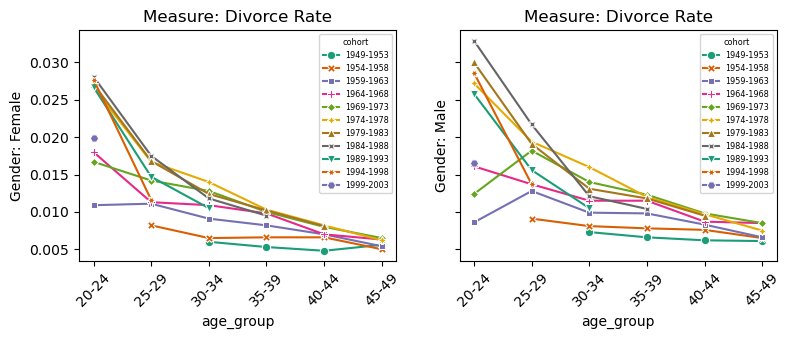

In [7]:
fig, axs = plot_multicol_data(df_cohort.loc[:,df_cohort.xs(('Female', 'Divorce Rate', ), 1, ('gender', 'measure', )).iloc[:,-51::5].columns], x_level='gender', y_level='measure')
fig.savefig(f'./rate_{dataset_mode}.svg', transparent=False, format='svg', bbox_inches='tight')
plt.show()
fig.clf()
plt.close()